Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Радует, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Отлично, что тебе удалось освоить внутренние методы кодировки признаков для некоторых моделей.
* Я оставил несколько советов, надеюсь они будут учтены в будущих проектах.
* Эта работа зачтена. Удачи в дальнейшем обучении.

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

__Описание данных__

__Признаки__    
DateCrawled — дата скачивания анкеты из базы     
VehicleType — тип автомобильного кузова      
RegistrationYear — год регистрации автомобиля      
Gearbox — тип коробки передач      
Power — мощность (л. с.)      
Model — модель автомобиля       
Kilometer — пробег (км)       
RegistrationMonth — месяц регистрации автомобиля      
FuelType — тип топлива      
Brand — марка автомобиля      
NotRepaired — была машина в ремонте или нет      
DateCreated — дата создания анкеты      
NumberOfPictures — количество фотографий автомобиля     
PostalCode — почтовый индекс владельца анкеты (пользователя)      
LastSeen — дата последней активности пользователя  
__Целевой признак__
Price — цена (евро)

## Подготовка данных

In [1]:
#импортируем необходимые библиотеки и инструменты
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [2]:
car_data = pd.read_csv('/datasets/autos.csv')

In [3]:
#посмотрим на наш датасет
display(car_data.info())
car_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


None

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Нашли следующие проблемы: пропуски, а также много ненужных столбцов, например:

DateCrawled — дата скачивания анкеты из базы    
RegistrationMonth — месяц регистрации автомобиля    
DateCreated — дата создания анкеты     
NumberOfPictures — количество фотографий автомобиля     
PostalCode — почтовый индекс владельца анкеты (пользователя)     
LastSeen — дата последней активности пользователя     
 

<div class="alert alert-block alert-success">
<b>Успех:</b> Загрузка и первичный осмотр проведены хорошо.
</div>

In [4]:
cars_data = car_data.drop(['DateCrawled', 'RegistrationMonth', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], axis='columns')

<div class="alert alert-block alert-success">
<b>Успех:</b> Согласен, что даты, константный признак и индекс нам не нужны.
</div>

In [5]:
display(cars_data.info())
cars_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 10 columns):
Price               354369 non-null int64
VehicleType         316879 non-null object
RegistrationYear    354369 non-null int64
Gearbox             334536 non-null object
Power               354369 non-null int64
Model               334664 non-null object
Kilometer           354369 non-null int64
FuelType            321474 non-null object
Brand               354369 non-null object
NotRepaired         283215 non-null object
dtypes: int64(4), object(6)
memory usage: 27.0+ MB


None

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


Пропуски есть в столбцах VehicleType, Gearbox, Model, FuelType, NotRepaired. Заменим NaN-ы нетипичным значением unk - модель воспримет их как отдельную категорию.

In [6]:
cars_data.fillna(value='unk', inplace=True)
cars_data.head()


,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,480,unk,1993,manual,0,golf,150000,petrol,volkswagen,unk
1,18300,coupe,2011,manual,190,unk,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,unk
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


<div class="alert alert-block alert-success">
<b>Успех:</b> Заполнить пропуски таким образом – хорошее решение в данном случае.
</div>

Проверим датасет на наличие выбросов.

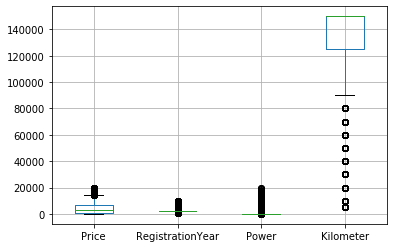

In [7]:
cars_data.boxplot()

<div class="alert alert-block alert-info">
<b>Совет: </b> Для визуализации распределений лучше использовать гистограммы, так как на ящиках с усами не видно кружочек – это одна точка или сотни точек.
</div>

Пробег и цену трогать не будем - здесь значения могут быть самыми разными. А вот выбросы в столбцах RegistrationYear и Power интересны - например, мощностью больше 1000 лошадиных сил могут похвастаться только спротивные автомобили, а год регистрации не может быть больше 2020 и меньше 1931, когда был зарегистрирован первый автомобиль.

In [8]:
#предположим, что в датасете все же есть такие мощные автомобили
cars_data = cars_data.query('RegistrationYear <= 2020 and RegistrationYear >= 1931 and Power <= 1200')

<div class="alert alert-block alert-success">
<b>Успех:</b> Выбросы в дате и мощности обработаны верно.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Я бы еще удалил строки, в которых Price=0, скорее всего это ошибки.
</div>

In [9]:
cars_data.shape

(353828, 10)

## Анализ моделей


Попробуем прямое кодирование, чтобы преобразовать категориальные признаки в численные.

In [10]:
cars_data_ohe = pd.get_dummies(cars_data, drop_first=True)

Подготовим признаки и целевой признак, а затем разделим данные на обучающую и тестовую выборк

In [11]:
#признаки для обучения модели линейной регрессии
features_lr = cars_data_ohe.drop(['Price'], axis = 1)
target_lr = cars_data_ohe['Price']

Преобразуем столбцы с категориальными признаки в тип данных category

In [12]:
categorical = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

In [13]:
for col in categorical:
    cars_data[col] = cars_data[col].astype('category')

In [14]:
#признаки для обучения моделей CBR и LGBM
features = cars_data.drop(['Price'], axis = 1)
target = cars_data['Price']

In [15]:
features_train_lr, features_test_lr, target_train_lr, target_test_lr = train_test_split(features_lr, target_lr, test_size=.25, random_state=12345)

In [16]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=.25, random_state=12345)

<div class="alert alert-block alert-success">
<b>Успех:</b> Кодировка и разбиение были сделаны верно.
</div>

In [17]:
#напишем формулу для получения значения метрики RMSE
def rmse (target, predictions):
    mse = mean_squared_error(target, predictions)
    rmse = mse ** 0.5
    return rmse

__Обучим и проанализируем время работы и качество моделей__

# LinearRegression

In [18]:
lr_model = LinearRegression()

In [20]:
%%time
lr_model.fit(features_train_lr, target_train_lr)

CPU times: user 21.2 s, sys: 5.6 s, total: 26.8 s
Wall time: 26.8 s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
%%time
predicted_lr = pd.Series(lr_model.predict(features_test_lr))

CPU times: user 112 ms, sys: 150 ms, total: 262 ms
Wall time: 226 ms


In [22]:
rmse(target_test_lr, predicted_lr)

2786.7709799955005

# CatBoostRegressor

In [23]:
#построим модель CBR и исследуем её работу с различными значениями гиперпараметра iterations с помощью кросс-валидации
for iteration in range(10, 111, 25):
    cat_model = CatBoostRegressor(loss_function="RMSE", iterations=iteration, depth=10, verbose=10, cat_features=categorical)
    cat_cv = cross_val_score(cat_model, features_train, target_train, cv=2)
    print("Score при iterations =", iteration, ":", cat_cv)
    print("Score mean =", sum(cat_cv)/len(cat_cv))
    print()

0:	learn: 4402.2802324	total: 350ms	remaining: 3.15s
9:	learn: 3706.9180528	total: 3.33s	remaining: 0us
0:	learn: 4431.0023641	total: 290ms	remaining: 2.61s
9:	learn: 3732.5483001	total: 3.28s	remaining: 0us
Score при iterations = 10 : [0.31996929 0.31827532]
Score mean = 0.3191223044585284

0:	learn: 4402.2802324	total: 227ms	remaining: 7.72s
10:	learn: 3642.9599504	total: 3.52s	remaining: 7.68s
20:	learn: 3121.5851039	total: 6.81s	remaining: 4.54s
30:	learn: 2773.2330590	total: 9.91s	remaining: 1.28s
34:	learn: 2663.9384032	total: 11.2s	remaining: 0us
0:	learn: 4431.0023641	total: 286ms	remaining: 9.73s
10:	learn: 3668.0902962	total: 3.58s	remaining: 7.8s
20:	learn: 3144.0813061	total: 6.77s	remaining: 4.51s
30:	learn: 2789.9046888	total: 9.97s	remaining: 1.29s
34:	learn: 2680.6278170	total: 11.3s	remaining: 0us
Score при iterations = 35 : [0.64837818 0.64660727]
Score mean = 0.647492725934678

0:	learn: 4402.2802324	total: 279ms	remaining: 16.5s
10:	learn: 3642.9599504	total: 3.67s	

In [24]:
#исследуем работу модели с различными значениями гиперпараметра depth
for depth in range(5, 16, 2):
    cat_model = CatBoostRegressor(loss_function="RMSE", iterations=20, depth=depth, verbose=10, cat_features=categorical)
    cat_cv = cross_val_score(cat_model, features_train, target_train, cv=2)
    print("Score при depth =", depth, ":", cat_cv)
    print("Score mean =", sum(cat_cv)/len(cat_cv))
    print()

0:	learn: 4416.5875559	total: 180ms	remaining: 3.42s
10:	learn: 3752.7601409	total: 2.07s	remaining: 1.7s
19:	learn: 3328.6877762	total: 3.67s	remaining: 0us
0:	learn: 4444.2379532	total: 62.8ms	remaining: 1.19s
10:	learn: 3776.3090329	total: 2.04s	remaining: 1.67s
19:	learn: 3340.6146409	total: 3.65s	remaining: 0us
Score при depth = 5 : [0.45251544 0.45299916]
Score mean = 0.45275730031755945

0:	learn: 4406.9675553	total: 216ms	remaining: 4.11s
10:	learn: 3689.1461891	total: 2.72s	remaining: 2.22s
19:	learn: 3240.4432253	total: 4.91s	remaining: 0us
0:	learn: 4436.3507930	total: 206ms	remaining: 3.9s
10:	learn: 3711.3209714	total: 2.6s	remaining: 2.12s
19:	learn: 3256.6330508	total: 4.69s	remaining: 0us
Score при depth = 7 : [0.48138363 0.48038876]
Score mean = 0.48088619631565255

0:	learn: 4403.7050902	total: 275ms	remaining: 5.22s
10:	learn: 3657.2681588	total: 3.37s	remaining: 2.76s
19:	learn: 3189.7753034	total: 6.17s	remaining: 0us
0:	learn: 4432.5990579	total: 267ms	remaining: 

<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что подбор параметров осуществлялся с помощью методов основанных на кросс-валидации.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Однако, в качестве метрики лучше указывать нашу целевую. Для этго в параметр scoring можно передать одну из готовых <a href="https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter">отсюда</a>. Однако, R2 очень сильно коррелирует с RMSE, так что это комментарий синий.
</div>

При увеличении iterations модель сначала дает лучшую точность (в 2 раза), затем увеличение точности начинает снижаться, до тех пор, пока разница не становится совсем маленькой. Скорость обучения модели для нас важна так же, как и точность ее работы, поэтому не будем жертвовать скоростью и выберем оптимальный вариант с числом iterations 85.

При изменении параметра depth прослеживается такая же тенденция, поэтому оптимальной глубиной будет число 13.

Измерим время обучения и работы модели со значением iterations = 90 и depth = 11

In [25]:
cat_model_90_11= CatBoostRegressor(loss_function="RMSE", iterations=90, depth=11, verbose=10)

In [26]:
%%time
cat_model_90_11.fit(features_train, target_train, cat_features=categorical)

0:	learn: 4414.1443522	total: 696ms	remaining: 1m 1s
10:	learn: 3640.2660736	total: 7.07s	remaining: 50.8s
20:	learn: 3113.1019108	total: 13.4s	remaining: 43.9s
30:	learn: 2757.6064213	total: 19.7s	remaining: 37.4s
40:	learn: 2507.5453846	total: 26s	remaining: 31s
50:	learn: 2322.1284447	total: 32s	remaining: 24.5s
60:	learn: 2195.6551522	total: 38.4s	remaining: 18.3s
70:	learn: 2104.5056862	total: 44.6s	remaining: 11.9s
80:	learn: 2038.8988468	total: 50.9s	remaining: 5.66s
89:	learn: 1990.5771005	total: 56.6s	remaining: 0us
CPU times: user 52.4 s, sys: 4.97 s, total: 57.3 s
Wall time: 58.5 s


In [27]:
%%time
predicted_cat_90_11 = pd.Series(cat_model_90_11.predict(features_test))

CPU times: user 172 ms, sys: 11.3 ms, total: 183 ms
Wall time: 143 ms


In [28]:
rmse(target_test, predicted_cat_90_11)

1993.2263874940566

# LightGBM

In [29]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'verbose': 0
}

In [30]:

lgbm_model = LGBMRegressor(**params)

In [31]:
%%time
lgbm_model.fit(features_train, target_train)

CPU times: user 8.51 s, sys: 0 ns, total: 8.51 s
Wall time: 8.6 s


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=6,
              metric='rmse', min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, verbose=0)

In [32]:
%%time
predictions_lgbm = lgbm_model.predict(features_test)

CPU times: user 1.24 s, sys: 0 ns, total: 1.24 s
Wall time: 1.29 s


In [33]:
rmse(target_test, predictions_lgbm)

1772.6379449873602

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что в случаях двух моделей выше использовались внутренние методы кодировка категорильаных признаков.
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что поробовал несколько разных моделей и не забыл про подбор парамтеров.
</div>

# Сравним результаты.



In [34]:
models = [['LR', 33.2, 273, 2787], ['CBR', 62, 244, 1993], 
       ['LGB', 3*60+21, 1.22*1000, 1773]] 
    
df = pd.DataFrame(models, columns =['model', 'train_time, sec', 'work_time, msec', 'rmse']) 
df

,model,"train_time, sec","work_time, msec",rmse
0,LR,33.2,273.0,2787
1,CBR,62.0,244.0,1993
2,LGB,201.0,1220.0,1773


<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что ты отдельно замерил время и собрал все показатели в однйо таблице.
</div>

# Вывод

Все модели градиентного бустинга(catboost, lightgbm) из коробки показывают относительно хорошие результаты, чего не скажешь про линейную регрессию.
Время предсказания любой модели значительно меньше, чем её обучение. Важно, чтобы время предсказания было как можно меньше - обучаем модель мы только один раз, но предсказывать она может до бесконечности.

Метрика RMSE лучше всего выглядит у модели LGB, но время ее работы слишком долгое. Быстрее всего обучается модель линейной регресии, но ее точность оставляет желать лучшего. У модели CatBoostRegressor небольшое время обучения/работы и приемлемая точность. Эту модель можно посоветовать сервису как прототип.

<div class="alert alert-block alert-success">
<b>Успех:</b> Сравнение проведено хорошо. Радует, что при выборе модели ты учитывал все показатели.
</div>

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x ]  Весь код выполняется без ошибок
- [x ]  Ячейки с кодом расположены в порядке исполнения
- [x ]  Выполнена загрузка и подготовка данных
- [x ]  Выполнено обучение моделей
- [x ]  Есть анализ скорости работы и качества моделей